Import stuff

In [16]:
!pip install matminer
!pip install pymatgen

^C
^C


In [17]:
# import libraries we will need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import pymatgen.core

Load all non-doped unique materials (14k)

In [18]:
df0 = pd.read_json("C:/Users/Droor/OneDrive - Harvard University/Desktop/Master Folder/College (2022-2026)/Hoffman summer/git-clone/superconductors-ml/datasets/unique_materials_14k.json")
df0.head()

,sc_id,supercon_formula,cleaned_formula,material_dict,highest_Tc,average_Tc,std_Tc,entry_count
0,[12787],Ag0.002Al0.998,Ag0.002Al0.998,"{'Ag': 0.002, 'Al': 0.998}",1.128,1.128,0.0,1
1,[12816],Ag0.005Zn0.995,Ag0.005Zn0.995,"{'Ag': 0.005, 'Zn': 0.995}",0.763,0.763,0.0,1
2,[25145],Bi3.99Ag0.01S3O4,Bi3.99Ag0.01S3O4,"{'Ag': 0.01, 'Bi': 3.99, 'O': 4.0, 'S': 3.0}",4.310,4.310,0.0,1
3,[23179],Sr1Pd1.98Ag0.02Ge2,Sr1Pd1.98Ag0.02Ge2,"{'Ag': 0.02, 'Ge': 2.0, 'Pd': 1.98, 'Sr': 1.0}",2.640,2.640,0.0,1
4,[25146],Bi3.97Ag0.03S3O4,Bi3.97Ag0.03S3O4,"{'Ag': 0.03, 'Bi': 3.9699999999999998, 'O': 4....",4.200,4.200,0.0,1


In [19]:
print(df0["cleaned_formula"].unique().shape[0])
comp1 = pymatgen.core.Composition("HHe3")
print(comp1['He'])

14577
3.0


In [ ]:
df1 = pd.read_csv('C:/Users/Droor/OneDrive - Harvard University/Desktop/Master Folder/College (2022-2026)/Hoffman summer/git-clone/superconductors-ml/data-prep/composition-14k.csv')
df1.head()

In [ ]:
# Get the composition of 14k materials
from matminer.featurizers.conversions import StrToComposition

df1 = StrToComposition().featurize_dataframe(df0, "cleaned_formula")
df1.head()
df1.to_csv('composition-14k.csv')

In [ ]:
# from matminer.featurizers.composition import ElementProperty
# ep_feat = ElementProperty.from_preset(preset_name="magpie")
# df2 = ep_feat.featurize_dataframe(df1, col_id="composition")  # input the "composition" column to the featurizer
# df2.head()

In [ ]:
# df2.to_csv('MMElementProperty14k')

In [ ]:
df2 = pd.read_csv('C:/Users/Droor/OneDrive - Harvard University/Desktop/Master Folder/College (2022-2026)/Hoffman summer/git-clone/superconductors-ml/data-prep/MMElementProperty14k.csv'

ElementProperty but defined with specific features:

In [31]:
from matminer.featurizers.composition import ElementProperty
hamidieh_feat = ElementProperty('magpie', ['AtomicWeight', 'FirstIonizationEnergy', 'CovalentRadius', 'Density', 'ElectronAffinity', 'HeatFusion', 'HeatCapacityMass', 'NValence'], ['mean', 'range', 'std_dev'] )
df_hamidieh = hamidieh_feat.featurize_dataframe(df1, col_id="composition")  # input the "composition" column to the featurizer
df_hamidieh.to_csv('magpie-hamidieh-14k.csv')

ElementProperty:   0%|          | 0/14577 [00:00<?, ?it/s]

In [39]:
df_hamidieh = pd.read_csv('C:/Users/Droor/OneDrive - Harvard University/Desktop/Master Folder/College (2022-2026)/Hoffman summer/git-clone/superconductors-ml/data-prep/magpie-hamidieh-14k.csv').iloc[:,1:]
df_hamidieh.columns

Index(['sc_id', 'supercon_formula', 'cleaned_formula', 'material_dict',
       'highest_Tc', 'average_Tc', 'std_Tc', 'entry_count', 'composition',
       'MagpieData mean AtomicWeight', 'MagpieData range AtomicWeight',
       'MagpieData std_dev AtomicWeight',
       'MagpieData mean FirstIonizationEnergy',
       'MagpieData range FirstIonizationEnergy',
       'MagpieData std_dev FirstIonizationEnergy',
       'MagpieData mean CovalentRadius', 'MagpieData range CovalentRadius',
       'MagpieData std_dev CovalentRadius', 'MagpieData mean Density',
       'MagpieData range Density', 'MagpieData std_dev Density',
       'MagpieData mean ElectronAffinity', 'MagpieData range ElectronAffinity',
       'MagpieData std_dev ElectronAffinity', 'MagpieData mean HeatFusion',
       'MagpieData range HeatFusion', 'MagpieData std_dev HeatFusion',
       'MagpieData mean HeatCapacityMass', 'MagpieData range HeatCapacityMass',
       'MagpieData std_dev HeatCapacityMass', 'MagpieData mean NValence'

features as described in Meredig et al 2015

In [ ]:
from matminer.featurizers.composition import Meredig
meredig_feat = ElementProperty(data_sources, features, stats)
df3 = meredig_feat.featurize_dataframe(df1, col_id="composition")  # input the "composition" column to the featurizer
df3.head()

Load BagofBonds data

In [ ]:
df_bagofbonds = pd.read_csv('C:/Users/Droor/OneDrive - Harvard University/Desktop/Master Folder/College (2022-2026)/Hoffman summer/bagofbonds_df.csv')

RUN MODELS:

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

df_for_model = df_hamidieh

def train_evaluate_regression_model(X, y, model, start_feature_index):

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)
    
    # Take only the features, not the ID columns
    X_train_2 = X_train[:, start_feature_index:]
    X_test_2 = X_test[:, start_feature_index:]

    # Train the model
    model.fit(X_train_2, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_2)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, r2, y_test, y_pred, model, X_train, X_test

# Step 1: Select the features and target variable
y = df_for_model['average_Tc'].values
# X0 = df_for_model.iloc[:, [1, 2, 3, 4, 8] + list(range(9, df_for_model.shape[1]))].values
X1 = df_for_model.iloc[:, [1, 2, 3, 4, 8] + list(range(9, df_for_model.shape[1]))].values

# XGB_stoichio_mse, XGB_stoichio_r2, XGB_stoichio_y_test, XGB_stoichio_y_pred, XGB_stoichio_model, XGB_stoichio_X_train, XGB_stoichio_X_test = train_evaluate_regression_model(X0, y, xgb.XGBRegressor(), 5)
XGB_nostoichio_mse, XGB_nostoichio_r2, XGB_nostoichio_y_test, XGB_nostoichio_y_pred, XGB_nostoichio_model, XGB_nostoichio_X_train, XGB_nostoichio_X_test = train_evaluate_regression_model(X1, y, xgb.XGBRegressor(), 5)

# print("XGBoost Regression (with stoichio features):")
# print("MSE:", XGB_stoichio_mse)
# print("R2 Score:", XGB_stoichio_r2)

print("XGBoost Regression (without stoichio features):")
print("MSE:", XGB_nostoichio_mse)
print("R2 Score:", XGB_nostoichio_r2)

XGBoost Regression (without stoichio features):
MSE: 110.92804378435613
R2 Score: 0.8839904485787994


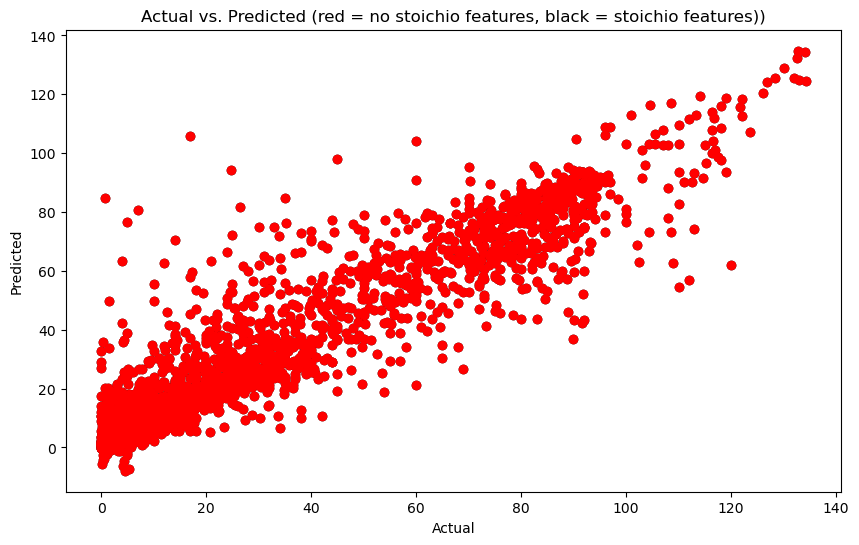

In [40]:
# Create a scatterplot of the actual versus predicted values
plt.figure(figsize=(10, 6))
plt.scatter(XGB_stoichio_y_test, XGB_stoichio_y_pred, color='k')
plt.scatter(XGB_nostoichio_y_test, XGB_nostoichio_y_pred, color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (red = no stoichio features, black = stoichio features))')
plt.show()

In [41]:
# Code to find the top 20 materials with the largest absolute difference between actual and predicted Tc values
# We have XGB_stoichio_mse, XGB_stoichio_r2, XGB_stoichio_y_test, XGB_stoichio_y_pred, XGB_stoichio_model, XGB_stoichio_X_train, XGB_stoichio_X_test

# Calculate the absolute difference between actual and predicted Tc values
differences = np.abs(XGB_nostoichio_y_test - XGB_nostoichio_y_pred)

# Sort the differences in descending order and get the indices of the sorted array
sorted_indices = np.argsort(differences)[::-1]

# Find the corresponding second value of XGB_stoichio_X_test for each top material
materials = [XGB_nostoichio_X_test[i, 0] for i in sorted_indices[:20]]
y_preds = [XGB_nostoichio_y_pred[i] for i in sorted_indices[:20]]
y_tests = [XGB_nostoichio_y_test[i] for i in sorted_indices[:20]]

# Print the materials with their corresponding second values of XGB_stoichio_X_test
print(differences)
for material, y_preds, y_tests in zip(materials, y_preds, y_tests):
    print(f"Material: {material}, prediction: {y_preds}, real: {y_tests}")

[1.44252496 0.01192017 1.71735342 ... 1.04228668 1.94622418 2.99643583]
Material: H4Si1, prediction: 105.93122100830078, real: 17.0
Material: O2, prediction: 84.64647674560547, real: 0.65
Material: Ge0.3Cu0.7Sr2Ca3Cu4O11.05, prediction: 80.7472915649414, real: 7.0
Material: Tl1Sr1.5Ce0.5Ca1Cu2O7, prediction: 76.64205169677734, real: 5.0
Material: Bi1Ga1Sr1.8Ca1.2Cu2O8, prediction: 94.29032897949219, real: 24.8
Material: Gd1Ba1Sr1Cu3O6.77, prediction: 63.2090950012207, real: 4.0
Material: Ba2Ca4Cu5C0.4B0.6O3+z, prediction: 61.843997955322266, real: 120.0
Material: Al1Sr2Ca1.4Y0.6Cu3O9.1, prediction: 70.43167114257812, real: 14.0
Material: B1Sr2Ca3Cu4O2N+3, prediction: 54.456748962402344, real: 110.0
Material: Sr0.6Ca0.2Cu1O2-z, prediction: 81.71467590332031, real: 26.5
Material: Bi1.8V0.2Sr2Ca2Cu3O2, prediction: 56.83723449707031, real: 112.0
Material: Bi1.6Pb0.4Sr2Cu3Ca2O10.04, prediction: 98.16849517822266, real: 45.0
Material: Y1Ba2Cu2.98Zr0.2O6.75, prediction: 36.88673400878906, rea

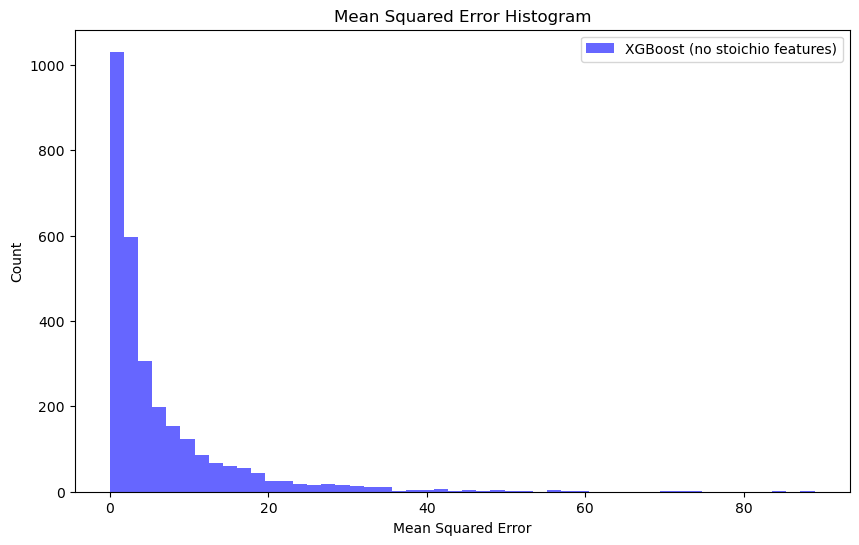

In [43]:
# Plot a histogram of the root mean squared error for each datapoint
plt.figure(figsize=(10, 6))
plt.hist(np.sqrt((XGB_nostoichio_y_test - XGB_nostoichio_y_pred)**2), bins=50, color='blue', alpha=0.6, label='XGBoost (no stoichio features)')
#plt.hist(np.sqrt((XGB_stoichio_y_test - XGB_stoichio_y_pred)**2), bins=50, color='green', alpha=0.6, label='XGBoost (stoichio features)')
plt.legend(loc='upper right')
plt.xlabel('Mean Squared Error')
plt.ylabel('Count')
plt.title('Mean Squared Error Histogram')
plt.show()

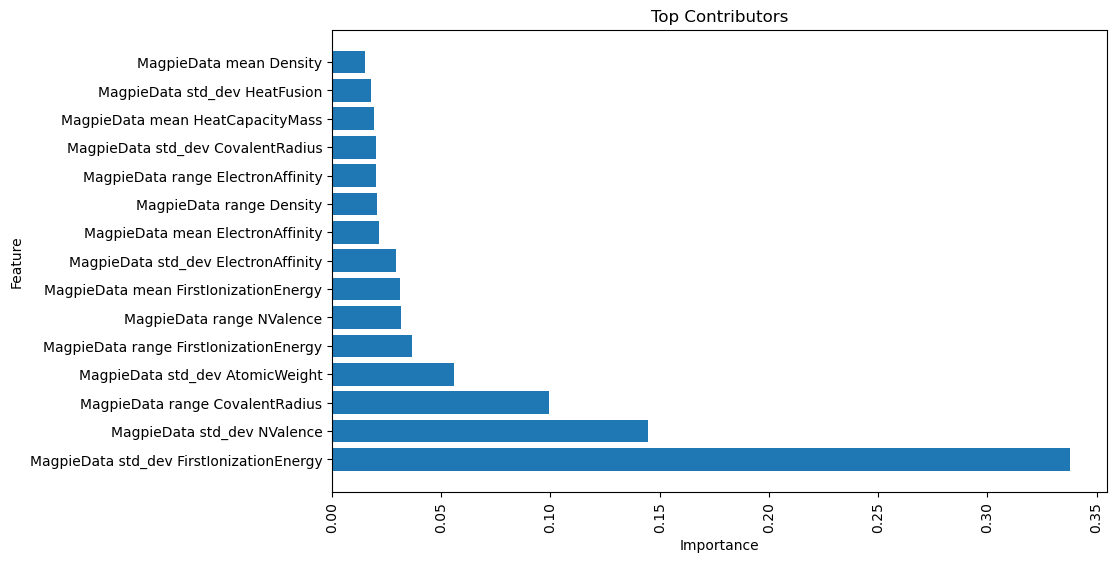

In [45]:
# Plot the feature importances of the model
# Get feature importances
importance = XGB_nostoichio_model.feature_importances_

# Get the column names of the selected features
# feature_columns_stoichio = df_for_model.columns[9:]
feature_columns_nostoichio = df_for_model.columns[9:]


# Create a DataFrame to store feature importances with column names
feature_importances = pd.DataFrame({'Feature': feature_columns_nostoichio, 'Importance': importance})

# Sort the DataFrame by importance in descending order
sorted_feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the top contributors
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_importances.head(15)['Feature'], sorted_feature_importances.head(15)['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Contributors')
plt.xticks(rotation=90)
plt.show()